In [30]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [31]:
class Perceptron(nn.Module):

    def __init__(self, input_dim, output_dim):
       
        super(Perceptron, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        
        print("Hello I'm the forward function")
        y = self.fc1(x_in)
        
        return y


In [32]:
model = Perceptron(3,1)

In [33]:
model

Perceptron(
  (fc1): Linear(in_features=3, out_features=1, bias=True)
)

In [34]:
model.fc1

Linear(in_features=3, out_features=1, bias=True)

In [35]:
model.fc1.weight

Parameter containing:
tensor([[ 0.4726, -0.2675, -0.1050]], requires_grad=True)

In [36]:
p2 = Perceptron(3,1)
p2.fc1.weight

Parameter containing:
tensor([[-0.5572,  0.4375,  0.0819]], requires_grad=True)

In [37]:
x_1 = torch.tensor([1.0,0.0,0.0])

In [38]:
x_1

tensor([1., 0., 0.])

In [39]:
p2(x_1)

Hello I'm the forward function


tensor([-1.0025], grad_fn=<ViewBackward0>)

In [40]:
p2.fc1.bias

Parameter containing:
tensor([-0.4453], requires_grad=True)

In [41]:
torch.sigmoid(x_1)

tensor([0.7311, 0.5000, 0.5000])

In [42]:
class LogReg(nn.Module):

    def __init__(self, input_dim, output_dim):
       
        super(LogReg, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        
        print("Hello I'm the forward function")
        y = self.fc1(x_in)
        y = torch.sigmoid(y)
        
        return y


In [43]:
lr1 = LogReg(3,1)

In [44]:
lr1.fc1.weight

Parameter containing:
tensor([[-0.1103, -0.2433,  0.1532]], requires_grad=True)

In [45]:
lr1.fc1.bias

Parameter containing:
tensor([0.5102], requires_grad=True)

In [46]:
x_1

tensor([1., 0., 0.])

In [47]:
lr1(x_1)

Hello I'm the forward function


tensor([0.5987], grad_fn=<SigmoidBackward0>)

In [48]:
x_2 = torch.tensor([-10000.0,-15.7,-8.9])

In [49]:
lr1(x_2)

Hello I'm the forward function


tensor([1.], grad_fn=<SigmoidBackward0>)

# Punktewolken bauen

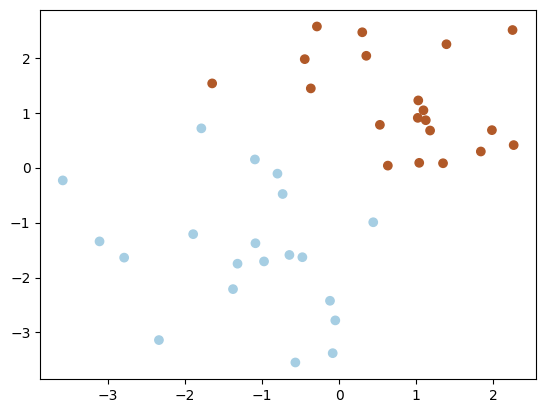

In [56]:
c11 = -1 
c12 = -1
c21 = 1 
c22 = 1

s1 = np.random.randn(20, 2) + [c11, c12]
s2 = np.random.randn(20, 2) + [c21, c22]

X = np.r_[s1,s2 ]
Y = [-1] * 20 + [1] * 20
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.cm.Paired)

# Ab hier passen die Variablennamen noch nicht

In [51]:
from torch import optim

lr = 0.1
optimizer = optim.Adam(params=lr1.parameters(), lr=lr)
bce_loss = nn.BCEWithLogitsLoss()

In [57]:
def train_model(model: nn.Module, n_epochs: int):
    for epoch in range(n_epochs):  # the model will train for a fixed number of epochs

        # reset gradients
        optimizer.zero_grad()
            
        x_batch = torch.randn(2,3)
        
        # get model predictions
        y_pred = model(x_batch).squeeze()
            
        # compute loss
        y = torch.tensor([0.0,1.0])
        loss = bce_loss(y_pred, y)
        print("Loss",loss)
            
        # backpropagate loss & compute the gradients
        loss.backward()
        
        print("Before step",model.fc1.weight)
            
        # update the weights using the optimizer
        optimizer.step()
        
        print("After step",model.fc1.weight)

In [60]:
train_model(lr1, n_epochs = 10)
train_model(p2, n_epochs = 10)


Hello I'm the forward function
Loss tensor(0.7115, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Before step Parameter containing:
tensor([[ 0.1550, -0.1679, -0.3760]], requires_grad=True)
After step Parameter containing:
tensor([[ 0.1619, -0.1630, -0.4068]], requires_grad=True)
Hello I'm the forward function
Loss tensor(0.7372, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Before step Parameter containing:
tensor([[ 0.1619, -0.1630, -0.4068]], requires_grad=True)
After step Parameter containing:
tensor([[ 0.1546, -0.1739, -0.4175]], requires_grad=True)
Hello I'm the forward function
Loss tensor(0.7043, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Before step Parameter containing:
tensor([[ 0.1546, -0.1739, -0.4175]], requires_grad=True)
After step Parameter containing:
tensor([[ 0.1463, -0.1774, -0.4285]], requires_grad=True)
Hello I'm the forward function
Loss tensor(0.6685, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Before step Parameter containing:
tensor([[ 0.1463,

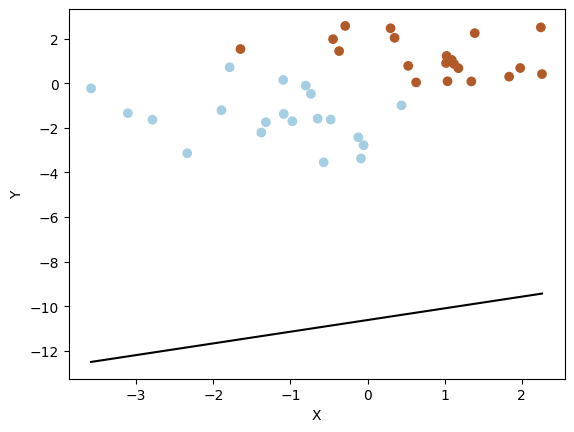

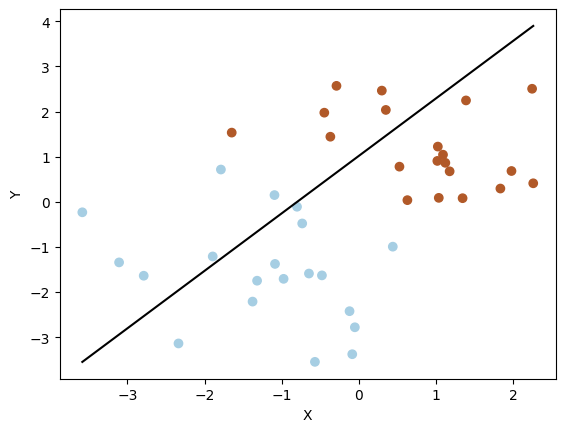

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundry(model: nn.Module):

    # Gewichte des Modells
    weights = model.fc1.weight.detach().numpy()
    bias = model.fc1.bias.detach().numpy()

    # Plot der Datenpunkte
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    # Plot der Decision Boundary
    x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y = -(weights[0][0] * x + bias) / weights[0][1]
    plt.plot(x, y, color='black')

    # Achsenbeschriftungen
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot anzeigen
    plt.show()

plot_decision_boundry(lr1)
plot_decision_boundry(p2)